<a href="https://colab.research.google.com/github/o-going/pdm01/blob/master/py-pandas/pandas_4_visualizing_df.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Python module 3. **pandas**

# Using pandas

* [10 Minutes to pandas](https://pandas.pydata.org/pandas-docs/stable/10min.html)
* [Pandas tutorial with interactive exercises](https://www.kaggle.com/pistak/pandas-tutorial-with-interactive-exercises)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # plt로 import
# %matplotlib inline  # work for Jupyter notebook or lab

In [4]:
# Creating a DataFrame by passing a NumPy array, with a datetime index and labeled columns:
dates = pd.date_range('20200928', periods=6)  # 6일 동안의 index를 생성
dates

DatetimeIndex(['2020-09-28', '2020-09-29', '2020-09-30', '2020-10-01',
               '2020-10-02', '2020-10-03'],
              dtype='datetime64[ns]', freq='D')

In [9]:
# head()
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))  # 데이터 프레임을 만듬
df

,A,B,C,D
2020-09-28,-0.463632,-1.009318,-0.415532,1.084482
2020-09-29,0.683119,0.186424,-0.988392,1.790322
2020-09-30,1.729759,-0.644525,0.205500,1.008011
2020-10-01,0.360093,-0.794777,-0.830980,-0.167211
2020-10-02,2.454527,-0.149616,-0.773745,-1.150682
2020-10-03,-0.841217,0.669148,-2.386039,-0.493727




---



# 데이터 시각화

#### [도전] 데이터프레임 df의 평균(mean(0))과 표준편차를 이용한 그래프
- 평균에 대한 꺽은선그래프
- 평균과 표준편차를 이용한 막대그래프
> x-축은 A,B,C,D

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  after removing the cwd from sys.path.


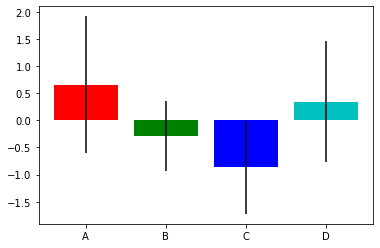

In [11]:
# df의 평균(mean(0))과 표준편차를 이용한 바그래프
bar_labels = df.columns
# plot bars
plt.bar(bar_labels, df.mean(0), yerr=df.std(0), color='rgbcy')
plt.show()  # text 설명이 없어지고 그래프만 보임.

***

## pandas의 데이터 시각화 (Visualization)

In [12]:
df

,A,B,C,D
2020-09-28,-0.463632,-1.009318,-0.415532,1.084482
2020-09-29,0.683119,0.186424,-0.988392,1.790322
2020-09-30,1.729759,-0.644525,0.205500,1.008011
2020-10-01,0.360093,-0.794777,-0.830980,-0.167211
2020-10-02,2.454527,-0.149616,-0.773745,-1.150682
2020-10-03,-0.841217,0.669148,-2.386039,-0.493727


### 꺽은선 그래프

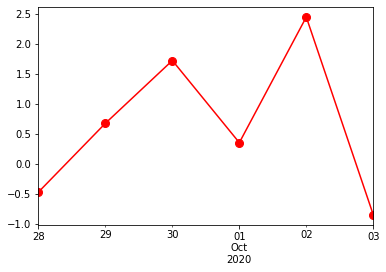

In [17]:
df['A'].plot(marker='o', c='r', ms=8) # 'A열'  마크는 o, 색상은 red, 마크 size = 8

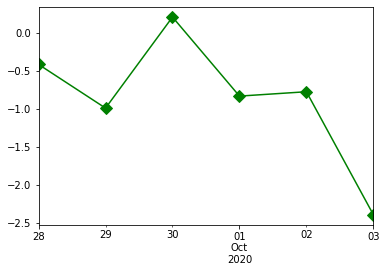

In [16]:
df['C'].plot(marker='D', c='g', ms=8)  # set figsize 'B열'

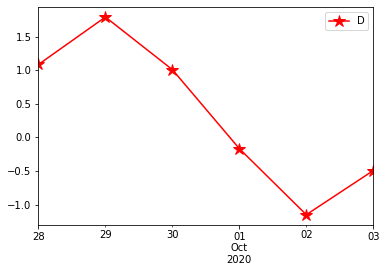

In [19]:
df.plot(y='D', marker='*', c='r', ms=12)   # x-축은 날짜인덱스 y = 'D'는 'D'열을 의미 -> (특정 열을 뽑는 또 다른 방법)

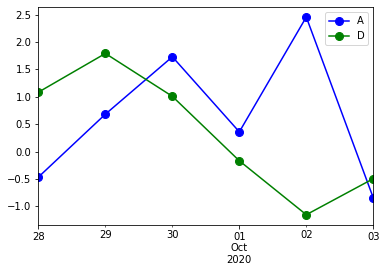

In [24]:
# 두 개의 그래프를 한 축에 그리기
# df['A','D'].plot(marker='o', c='r', ms=8) # 오류가 뜨는데 이 코드는 두개다 뽑지 못함. 밑의 코드로 해결 가능.
df[['A','D']].plot(marker='o', color='bg', ms=8)  # works!, change colors (대괄호로 두번 묶어 주어야지 두개를 뽑을 수 있음.)
# 두개 이상의 그래프를 다른 색깔로 그리고 싶으면 "color"라는 속성에 두개의 색을 지정해 주어야함.

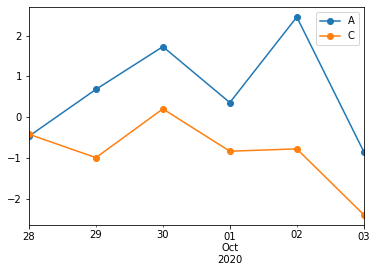

In [25]:
df.plot(y=['A','C'], marker='o')  
# 동시에 리스트로 한 묶음 해서 뽑아내면 하나의 axis에 그려짐, color를 지정을 안하면 자동으로 선택이 되어서 그려짐.

### 산포도 (Scatter graph)
-> 서로서로 어떤 식으로 관련되어서 분포하느냐

In [26]:
df

,A,B,C,D
2020-09-28,-0.463632,-1.009318,-0.415532,1.084482
2020-09-29,0.683119,0.186424,-0.988392,1.790322
2020-09-30,1.729759,-0.644525,0.205500,1.008011
2020-10-01,0.360093,-0.794777,-0.830980,-0.167211
2020-10-02,2.454527,-0.149616,-0.773745,-1.150682
2020-10-03,-0.841217,0.669148,-2.386039,-0.493727


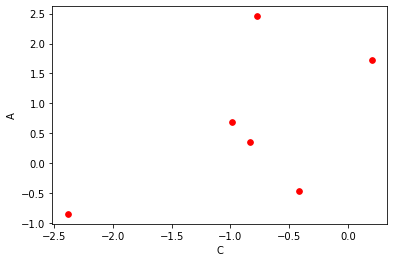

In [27]:
df.plot(kind='scatter',x='C',y='A', color='r', marker='o', s=32) 
# 데이터가 작아서 관련성을 찾기가 어려움.

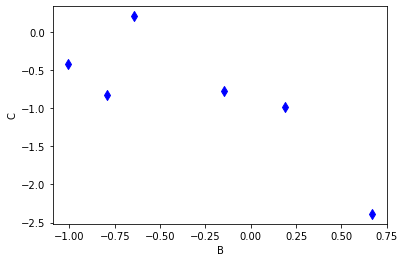

In [28]:
df.plot(kind='scatter',x='B',y='C', color='blue', marker='d', s=50)  

### 바 그래프

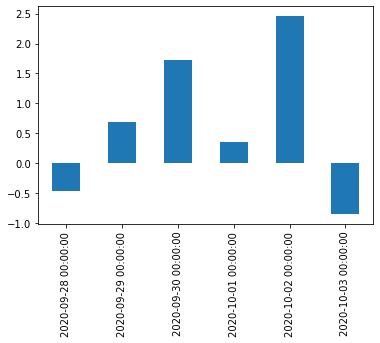

In [29]:
df['A'].plot.bar()  # A열의 바 그래프

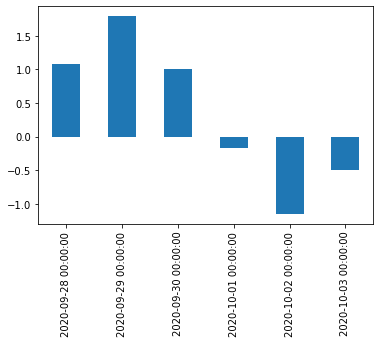

In [30]:
df['D'].plot.bar()  # D열의 바 그래프

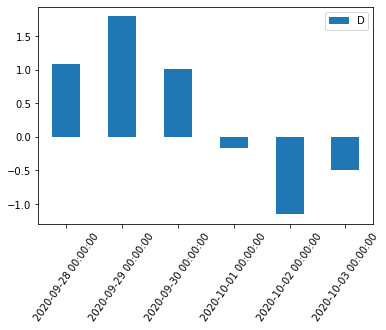

In [33]:
df.plot(kind='bar', y='D', rot=55)  
# rot라는 속성을 추가하면 x축의 label값들이 75도 각도로 변함.

#### 다중 바그래프

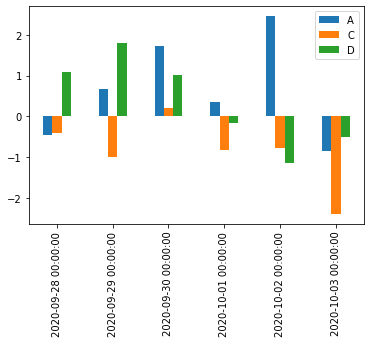

In [36]:
df.plot(kind='bar',y=['A','C','D']) # 세개의 열에 대한 바 그래프(리스트로 묶음)

#### 평균/표준편차 그래프

In [39]:
df.mean(0), df.std(0), df.columns # 열 방향으로 평균, 표준편차를 구함.

(A    0.653775
 B   -0.290444
 C   -0.864865
 D    0.345199
 dtype: float64, A    1.262629
 B    0.642582
 C    0.858634
 D    1.120559
 dtype: float64, Index(['A', 'B', 'C', 'D'], dtype='object'))

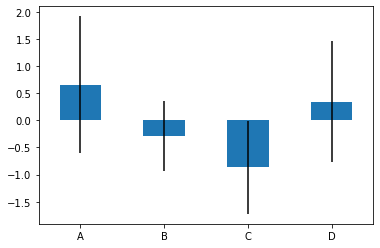

In [45]:
# plot bars
# bar_labels = df.columns
# plt.bar(bar_labels, df.mean(0), yerr=df.std(0))
df.mean(0).plot.bar(yerr=df.std(0), rot=0) # 원래 x축의 label이 가로로 있었는데 rot를 사용해서 세로로 글자를 돌려줌.



---



### 그래프 이어 그리기

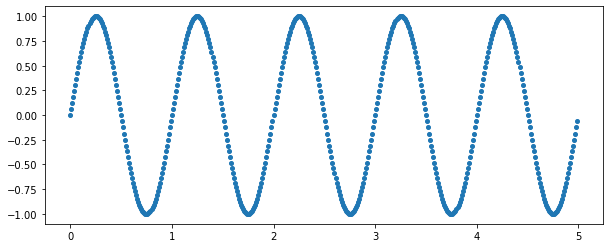

In [49]:
x1 = np.arange(0.0, 5.0, 0.01)  # 0부터 5까지 
y1 = np.sin(2*np.pi*x1) # sin2pi x1 값
plt.figure(figsize=(10,4))  # 가로로 10, 세로로 4비율
plt.plot(x1, y1, 'o', ms = 4)

In [51]:
x1.shape, y1.shape  # 길이가 500인 일반 벡터

((500,), (500,))

#### pandas 데이터프레임을 이용한 그래프 

In [53]:
df = pd.DataFrame(dict(sine=y1), index=x1, columns=['sine'])  
# dict에 key값을 할당해주고, index를 설정, columns 이름을 sine으로 
df.head()

,sine
0.00,0.000000
0.01,0.062791
0.02,0.125333
0.03,0.187381
0.04,0.248690


In [55]:
df.tail() # 5는 포함 x

,sine
4.95,-0.309017
4.96,-0.248690
4.97,-0.187381
4.98,-0.125333
4.99,-0.062791


In [57]:
len(df)

500

In [62]:
pre_size = int(len(df) * 0.8) # 500의 앞부분 80%, 뒤에는 20%
post_size = len(df) - pre_size
pre, post = df.iloc[0:pre_size], df.iloc[pre_size:len(df)]
print(len(pre), len(post))

400 100


In [63]:
post.shape 

(100, 1)

In [67]:
post2 = post + np.random.normal(scale=0.2, size=len(post)).reshape(-1,1)
# 가우시안 잡음을 만들어서 post 개수만큼 만듬 잡음을 (100, 1) 형태로 맞춰줌. -> 20% 가우시안 잡음을 넣어줌.

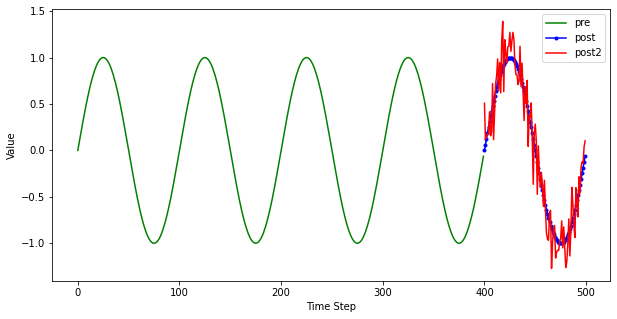

In [70]:
plt.figure(figsize=(10,5))
plt.plot(np.arange(0, len(pre)), pre, 'g', label="pre")
plt.plot(np.arange(len(pre), len(pre) + len(post)), post, 'b', marker='.', label="post")
# 뒷부분 20%를 blue로
plt.plot(np.arange(len(pre), len(pre) + len(post)), post2, 'r', label="post2")
# 잡음이 들어간 sin 함수로 그리고 색상은 red로
plt.ylabel('Value')
plt.xlabel('Time Step')
plt.legend()
plt.show();

#### post  post2를 동시에 그려서 두 그래프를 비교해보시오. 

- subplot 사용

In [ ]:
plt.figure(figsize=(10,5))
